I've been watching Jeopardy for awhile now and have suspected that there are common themes for certain answers. For example, if the words "planet" and "acid" appear in the same clue, then it's likely that the answer is "Venus" because of its sulfuric acid rain clouds. To investigate this, I used the database of Jeopardy questions compiled by the [j-archive](http://www.j-archive.com/) which was scraped by [reddit user *trexmatt* and posted as a json file](https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file/).

*This JSON file is described as follows:*

---
The json file is an unordered list of questions where each question has

* 'category' : the question category, e.g. "HISTORY"

* 'value' : Dollar value of the question as string, e.g. "$200"   (Note: This is "None" for Final Jeopardy! and Tiebreaker questions)

* 'question' : text of question (Note: This sometimes contains hyperlinks and other things messy text such as when there's a picture or video question) 

* 'answer' : text of answer

* 'round' : one of "Jeopardy!","Double Jeopardy!","Final Jeopardy!" or "Tiebreaker" (Note: Tiebreaker questions do happen but they're very rare (like once every 20 years))

* 'show_number' : string of show number, e.g '4680'

* 'air_date' : the show air date in format YYYY-MM-DD
---

## Let's get started!

To get started with this jupyter notebook, first download the [Jeopardy json file](https://drive.google.com/file/d/0BwT5wj_P7BKXb2hfM3d2RHU1ckE/view) and place it in the same directory as this notebook.

I'll be using the [pandas package from python](http://pandas.pydata.org/) to explore the dataset. 

In [1]:
# First import the pandas package and load the json file into a dataframe called df.
import pandas as pd
df = pd.read_json('JEOPARDY_QUESTIONS1.json')

In [2]:
# Let's take a look at the first few rows.
df.head()

,air_date,answer,category,question,round,show_number,value
0,2004-12-31,Copernicus,HISTORY,"'For the last 8 years of his life, Galileo was...",Jeopardy!,4680,$200
1,2004-12-31,Jim Thorpe,ESPN's TOP 10 ALL-TIME ATHLETES,'No. 2: 1912 Olympian; football star at Carlis...,Jeopardy!,4680,$200
2,2004-12-31,Arizona,EVERYBODY TALKS ABOUT IT...,'The city of Yuma in this state has a record a...,Jeopardy!,4680,$200
3,2004-12-31,McDonald\'s,THE COMPANY LINE,"'In 1963, live on ""The Art Linkletter Show"", t...",Jeopardy!,4680,$200
4,2004-12-31,John Adams,EPITAPHS & TRIBUTES,"'Signer of the Dec. of Indep., framer of the C...",Jeopardy!,4680,$200


In [3]:
# While it's fun that the first question is about astronomy, 
# I can't see the whole question. Let's fix that.
pd.set_option('max_colwidth', 300)
df.head()

,air_date,answer,category,question,round,show_number,value
0,2004-12-31,Copernicus,HISTORY,"'For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory'",Jeopardy!,4680,$200
1,2004-12-31,Jim Thorpe,ESPN's TOP 10 ALL-TIME ATHLETES,"'No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves'",Jeopardy!,4680,$200
2,2004-12-31,Arizona,EVERYBODY TALKS ABOUT IT...,"'The city of Yuma in this state has a record average of 4,055 hours of sunshine each year'",Jeopardy!,4680,$200
3,2004-12-31,McDonald\'s,THE COMPANY LINE,"'In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger'",Jeopardy!,4680,$200
4,2004-12-31,John Adams,EPITAPHS & TRIBUTES,"'Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States'",Jeopardy!,4680,$200


In [4]:
# Now let's see how much data we have.
df.count()

air_date       216930
answer         216930
category       216930
question       216930
round          216930
show_number    216930
value          213296
dtype: int64

In [5]:
# There are 216930 questions in the set, 
# but the *value* column is missing some. 
# It must have some null values for Final Jeopardy! 
# and Tie Breaker round. Let's check that out to make sure.

df[df['value'].isnull()]['round'].value_counts()

Final Jeopardy!    3631
Tiebreaker            3
Name: round, dtype: int64

In [6]:
# Make sure everything adds up.
213296+3631+3

216930

In [7]:
# I'm curious about those tiebreaker questions...
df[df['round'] == "Tiebreaker"]

,air_date,answer,category,question,round,show_number,value
12305,2007-11-13,The Children\'s Hour,CHILD'S PLAY,'A Longfellow poem & a Lillian Hellman play about a girls' boarding school share this timely title',Tiebreaker,5332,None
184710,1997-05-19,the Articles of Confederation,THE AMERICAN REVOLUTION,"'On Nov. 15, 1777 Congress adopted this constitution but it wasn't ratified by the states until March 1, 1781'",Tiebreaker,2941,None
198973,2002-09-20,Professor Dumbledore,LITERARY CHARACTERS,"'Hogwarts headmaster, he's considered by many to be the greatest wizard alive'",Tiebreaker,4150,None


It looks like Tiebreakers happen rarely, about every 5 years or so, rather than every 20 years as stated in the file description.

In [8]:
# Now let's take a look at the top categories 
# by creating a list of the categories and their counts
category_counts = df['category'].value_counts() 
# Here are the top categories in this list.
category_counts[:15]

BEFORE & AFTER             547
SCIENCE                    519
LITERATURE                 496
AMERICAN HISTORY           418
POTPOURRI                  401
WORLD HISTORY              377
WORD ORIGINS               371
COLLEGES & UNIVERSITIES    351
HISTORY                    349
SPORTS                     342
U.S. CITIES                339
WORLD GEOGRAPHY            338
BODIES OF WATER            327
ANIMALS                    324
STATE CAPITALS             314
Name: category, dtype: int64

In [9]:
# Here are some questions from the most popular category, Before & After.
df[df['category']=='BEFORE & AFTER'].head()

,air_date,answer,category,question,round,show_number,value
3557,2004-06-28,Freaky Friday the 13th,BEFORE & AFTER,'1980 scarefest in which mom & daughter switch bodies one day & are stalked by Jason at Camp Crystal Lake',Double Jeopardy!,4576,$400
3563,2004-06-28,Erik the Red Giant,BEFORE & AFTER,'Leif Ericson's dad who was a huge star with low surface temperature',Double Jeopardy!,4576,$800
3569,2004-06-28,Nancy Drew Barrymore,BEFORE & AFTER,"'Fictional girl sleuth who's the granddaughter of ""The Great Profile""'",Double Jeopardy!,4576,$1200
3575,2004-06-28,Cape Horn o\' Plenty,BEFORE & AFTER,'Projection at the southern tip of South America also called a cornucopia',Double Jeopardy!,4576,$1600
3581,2004-06-28,the Richard Donner Party,BEFORE & AFTER,"'""Lethal Weapon"" director whose group was caught in a Sierra Nevada pass in the winter of 1846-47'",Double Jeopardy!,4576,$2000


I enjoy word play and *Before & After* is one of my favorite categories, but these questions can be **TOUGH**.  [Jeremy Singer-Vine did some Jeopardy analysis](http://www.slate.com/articles/arts/culturebox/2011/02/ill_take_jeopardy_trivia_for_200_alex.html) and found that the Before and After category is actually the number one category in Double Jeopardy as well. It makes sense that this difficult category appears in Double Jeopardy, the most lucrative of the two rounds in Jeopardy.

## Does "Planet" + "acid" = "Venus"?

Let's go back to the idea that keywords in a question can give hints about the answer is without needing to understand the entirety of the question, like in the case of *planet + acid = Venus*. Let's see if this is the case for Venus and if I can find more of these.

In [10]:
df[(df["question"].str.contains('planet')) & (df["question"].str.contains('acid'))]

,air_date,answer,category,question,round,show_number,value
172015,1996-12-09,Venus,THE PLANETS,'Layers of sulfuric acid clouds completely obscure the surface of this neighboring planet',Jeopardy!,2826,$300
203839,2004-10-19,Venus,THE NIGHTTIME SKY,"'Called the Earth's twin, this planet's surface features are obscured by thick clouds of sulfuric acid'",Double Jeopardy!,4627,$400


In [11]:
# Here's another fun one :)
df[(df["question"].str.contains('sandworms'))]

,air_date,answer,category,question,round,show_number,value
4161,2002-12-18,"""Dune""",WORMS,"'In this 1965 sci-fi novel, giant sandworms on the planet Arrakis create a much-desired spice called melange'",Jeopardy!,4213,$1000


## Cleaning the data

After playing with the data and getting a feel for the format of the columns and rows, it's a good idea to start cleaning it up. This will help when I do more statistical work later on. Also, once I have a nice clean dataset, I can explore the idea of keywords in more detail. 

To get started, let's see what sort of data types we are dealing with.

In [12]:
# Check data types
df.dtypes

air_date       object
answer         object
category       object
question       object
round          object
show_number     int64
value          object
dtype: object

The data type *object* here is a string. Let's convert some of these columns to a more useful format and clean up the strings.

In [13]:
# Convert 'air_date' to date/time format.
df['air_date'] = pd.to_datetime(df['air_date'], yearfirst= True)
# Convert 'value' to float after removing non-essential characters.
df['value'] = df['value'].str.replace('$','').str.replace(',','').astype(float)

In [14]:
# Check data types again.
df.dtypes

air_date       datetime64[ns]
answer                 object
category               object
question               object
round                  object
show_number             int64
value                 float64
dtype: object

In [15]:
# We should also remove the html text from the questions.
# Let's take a look at the questions with links in them.
df[df['question'].str.contains('http')].head(3)

,air_date,answer,category,question,round,show_number,value
29,2004-12-31,Horton,DR. SEUSS AT THE MULTIPLEX,"'<a href=""http://www.j-archive.com/media/2004-12-31_DJ_23.mp3"">Beyond ovoid abandonment, beyond ovoid betrayal... you won't believe the ending when he ""Hatches the Egg""</a>'",Double Jeopardy!,4680,400.0
39,2004-12-31,an old-fashioned,"""X""s & ""O""s","'The shorter glass seen <a href=""http://www.j-archive.com/media/2004-12-31_DJ_12.jpg"" target=""_blank"">here</a>, or a quaint cocktail made with sugar & bitters'",Double Jeopardy!,4680,800.0
40,2004-12-31,Yertle,DR. SEUSS AT THE MULTIPLEX,"'<a href=""http://www.j-archive.com/media/2004-12-31_DJ_26.mp3"">Ripped from today's headlines, he was a turtle king gone mad; Mack was the one good turtle who'd bring him down</a>'",Double Jeopardy!,4680,1200.0


In [16]:
# This step can be skipped when working with the notebook. 
# It is only necessary to display the html correctly on the blog page.
import cgi 
df['question_htmlview'] = df['question'].apply(lambda x: cgi.escape(x))
df[df['question'].str.contains('http')].head(3)

,air_date,answer,category,question,round,show_number,value,question_htmlview
29,2004-12-31,Horton,DR. SEUSS AT THE MULTIPLEX,"'<a href=""http://www.j-archive.com/media/2004-12-31_DJ_23.mp3"">Beyond ovoid abandonment, beyond ovoid betrayal... you won't believe the ending when he ""Hatches the Egg""</a>'",Double Jeopardy!,4680,400.0,"'&lt;a href=""http://www.j-archive.com/media/2004-12-31_DJ_23.mp3""&gt;Beyond ovoid abandonment, beyond ovoid betrayal... you won't believe the ending when he ""Hatches the Egg""&lt;/a&gt;'"
39,2004-12-31,an old-fashioned,"""X""s & ""O""s","'The shorter glass seen <a href=""http://www.j-archive.com/media/2004-12-31_DJ_12.jpg"" target=""_blank"">here</a>, or a quaint cocktail made with sugar & bitters'",Double Jeopardy!,4680,800.0,"'The shorter glass seen &lt;a href=""http://www.j-archive.com/media/2004-12-31_DJ_12.jpg"" target=""_blank""&gt;here&lt;/a&gt;, or a quaint cocktail made with sugar &amp; bitters'"
40,2004-12-31,Yertle,DR. SEUSS AT THE MULTIPLEX,"'<a href=""http://www.j-archive.com/media/2004-12-31_DJ_26.mp3"">Ripped from today's headlines, he was a turtle king gone mad; Mack was the one good turtle who'd bring him down</a>'",Double Jeopardy!,4680,1200.0,"'&lt;a href=""http://www.j-archive.com/media/2004-12-31_DJ_26.mp3""&gt;Ripped from today's headlines, he was a turtle king gone mad; Mack was the one good turtle who'd bring him down&lt;/a&gt;'"


In [17]:
# How important are these questions with links?
x = df[df['question'].str.contains('http')]['question'].count()
y = df['question'].count()
float(x)/float(y)

0.04852256488268105

About 5% of Jeopardy questions have a link which may contain a relevant image or sound file. I won't miss much if I ignore the information contained in the links, i.e., pictures, videos, audio, etc. 

### Regular expressions are greedy.

In order to remove the html text within the angled brackets, I initially used the following regular expression replacement:

`df['question'] = df['question'].str.replace('<.*>','')`

My first attempt was close to correct, but I only discovered accidentally later on that my regular expression was removing too much text. 

The question 

* "`&lt;a href="http://www.j-archive.com/media/2010-07-06_DJ_14.jpg" target="_blank"&gt;This dog breed seen here&lt;/a&gt;' is a loyal and protective companion`"

was modified to be 

* `is a loyal and protective companion`

Uh-oh. It should be `This dog breed seen here is a loyal and protective companion`

The regular expression was removing **everything** between the very first angled bracket and the very last angled bracket. This is because regular expressions are inherently "greedy"; they try to maximize the match. Luckily, this can be turned off by using a question mark. The [Google Python class](https://developers.google.com/edu/python/) gives a really nice [explanation](
https://developers.google.com/edu/python/regular-expressions#greedy-vs-non-greedy-optional) of this.

To fix my problem I added a question mark. (Many problems in life can be fixed by asking a question. ;) )

`df['question'] = df['question'].str.replace('<.*?>', "")`

(By the way, I found this mistake by chance when checking the JSON file I create at the end of this notebook. The first rows of the file were reordered to show the problem question above. Argh!)

In [18]:
# Let's do this! Remove the text within <...>  to get rid of the links.
df['question'] = df['question'].str.replace('<.*?>', "")  #GREEDY --> replace('<.*>','')

# Check results.
print df[df['question'].str.contains('<')].head()
print df[df['question'].str.contains('>')].head()

Empty DataFrame
Columns: [air_date, answer, category, question, round, show_number, value, question_htmlview]
Index: []
Empty DataFrame
Columns: [air_date, answer, category, question, round, show_number, value, question_htmlview]
Index: []


In [19]:
# Check the problem question from above.
df[df['question'].str.contains('protective companion')]

,air_date,answer,category,question,round,show_number,value,question_htmlview
100,2010-07-06,a German Shepherd,JUST THE FACTS,'This dog breed seen here is a loyal and protective companion',Double Jeopardy!,5957,1200.0,"'&lt;a href=""http://www.j-archive.com/media/2010-07-06_DJ_14.jpg"" target=""_blank""&gt;This dog breed seen here&lt;/a&gt; is a loyal and protective companion'"


In [20]:
# Check if there are any other links.
df[df['question'].str.contains('http')]

,air_date,answer,category,question,round,show_number,value,question_htmlview
12215,2009-10-01,forward slash,PUNCTUATION,'http://www.j-archive.com/Read all about me at www.jeopardy.com this punctuation mark showguide_bioalex.php',Double Jeopardy!,5759,400.0,'http://www.j-archive.com/Read all about me at www.jeopardy.com this punctuation mark showguide_bioalex.php'
95991,2007-09-26,hypertext,"WHAT THE ""H""?","'It's the ""ht"" in http & html'",Double Jeopardy!,5298,1200.0,"'It's the ""ht"" in http &amp; html'"
142576,2003-04-15,a colon & two slashes,MARKS,"'On the Internet, these three marks separate http from www'",Jeopardy!,4297,400.0,"'On the Internet, these three marks separate http from www'"


It looks like all the http links have been removed except the first one shown above. I'll fix that one by hand.

In [21]:
df['question'] = df['question'].str.replace('http://www.j-archive.com/','')
df['question'] = df['question'].str.replace('showguide_bioalex.php','')
# Check work
df[df['question'].str.contains('Read all about me')]

,air_date,answer,category,question,round,show_number,value,question_htmlview
12215,2009-10-01,forward slash,PUNCTUATION,'Read all about me at www.jeopardy.com this punctuation mark ',Double Jeopardy!,5759,400.0,'http://www.j-archive.com/Read all about me at www.jeopardy.com this punctuation mark showguide_bioalex.php'


In [22]:
# Now let's remove the beginning and ending quotation marks.
df['question'] = df['question'].str.rstrip("'").str.lstrip("'")
# Let's also remove the column "question_htmlview"
del df['question_htmlview']

### Fixing the dollar amounts after the change in 2001.

The dollar amounts on Jeopardy used to actually be half of what they are now. The first Jeopardy round's dollar amounts originally ranged from \$100 to \$500. Today they range from \$200 to \$1000. For the Double Jeopardy round, currently the dollar amounts range from \$400 to \$2000. This changed on November 26, 2001. (Thank you [wikipedia.](https://en.wikipedia.org/wiki/Jeopardy!))

To make the dollar amounts consistent across the years, my plan is to multiply dollar amounts before November 26, 2001 by a factor of 2. But first I'll check that the data appears to reflect this transition date and then I'll change the dollar amounts and check the result.

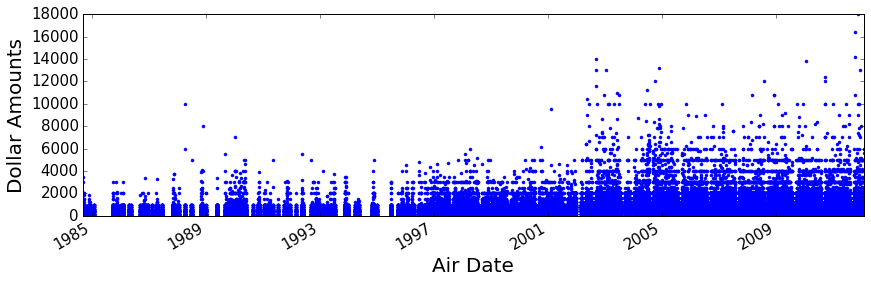

In [23]:
# This command is needed in order to take advantage of matplotlib features.
import matplotlib.pyplot as plt   
# The following command allows plots to appear in the jupyter notebook.
%matplotlib inline  

ax = df.plot(x='air_date', y='value',  style = '.', 
             legend = False, figsize=(14,4), fontsize = 15)
ax.set_xlabel("Air Date",fontsize = 20)
ax.set_ylabel("Dollar Amounts",fontsize = 20)

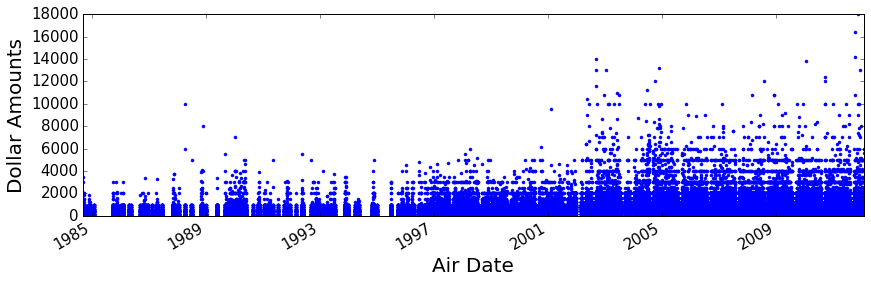

In [24]:
#  Use a semicolon at the end of the last line to remove the "matplotlib" text above the plot.
ax = df.plot(x='air_date', y='value',  style = '.', 
             legend = False, figsize=(14,4), fontsize = 15)
ax.set_xlabel("Air Date",fontsize = 20)
ax.set_ylabel("Dollar Amounts",fontsize = 20);

Now, this plot shows the dollar amounts for all clues, even the Daily Doubles and Final Jeopardy clues, which can be any dollar amount because the contestant sets the amount. If I look only in the dollar range that is offered by plain old Jeopardy clues I'll get a clearer picture of what is going on. The smallest offered value is \$100 from before 2001 and the largest is \$2000 from after 2001.

Another thing I noticed about this plot is that there doesn't seem to be the same density of points before 1997. I'll look into that after I adjust the dollar amounts.

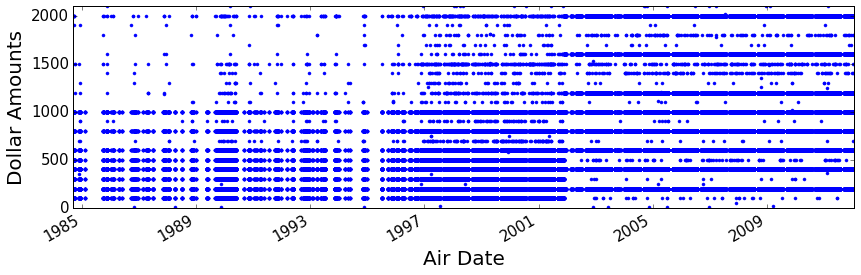

In [25]:
# Zooming in on the non-Daily Double dollar range, from $100-$2000
ax = df.plot(x='air_date', y='value',  style = '.', 
             legend = False, figsize=(14,4), fontsize = 15)
ax.set_xlabel("Air Date",fontsize = 20)
ax.set_ylabel("Dollar Amounts",fontsize = 20)
ymin = 0.0
ymax = 2100.0
ax.set_ylim(ymin,ymax);

Take a look at the dollar amounts for \$100, \$300, and \$500. Before 2001, every Jeopardy episode had at least one clue worth \$100, \$300, and \$500.  But, notice that after 2001, there are fewer of these amounts; clues becomes more sparse for these dollar amounts. This is because those dollar amounts are from wagers only, not from regular clues. So, it looks like the dollar amount hasn't been modified in anyway. 

In order to get all of the clues normalized to the same dollar amount, I'm going to multiply values before 2001 by a factor of 2. This way, when we compare values at any time, we'll be making a fair comparison that takes into account the "inflation" of the dollar amounts.

In [26]:
# Make a new column that contains the original value 
# so we can compare the values before and after.
df['value_original'] = df['value']
df.head()

,air_date,answer,category,question,round,show_number,value,value_original
0,2004-12-31,Copernicus,HISTORY,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Jeopardy!,4680,200.0,200.0
1,2004-12-31,Jim Thorpe,ESPN's TOP 10 ALL-TIME ATHLETES,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jeopardy!,4680,200.0,200.0
2,2004-12-31,Arizona,EVERYBODY TALKS ABOUT IT...,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Jeopardy!,4680,200.0,200.0
3,2004-12-31,McDonald\'s,THE COMPANY LINE,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",Jeopardy!,4680,200.0,200.0
4,2004-12-31,John Adams,EPITAPHS & TRIBUTES,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",Jeopardy!,4680,200.0,200.0


In [27]:
# Double values for the dataframe where date is before November 26, 2001. 
df.loc[df['air_date'] < "2001-11-26", ['value']] = 2.0 * df['value']

In [28]:
# Check work. Original_value and value should differ by a factor of two.
df[df['air_date']<"2001-11-26"].head()

,air_date,answer,category,question,round,show_number,value,value_original
117,2000-12-18,Princess Diana,ROYAL FEMALE NICKNAMES,"Prime Minister Tony Blair dubbed her ""The People's Princess""",Jeopardy!,3751,200.0,100.0
118,2000-12-18,The West Wing,TV ACTORS & ROLES,"Once Tommy Mullaney on ""L.A. Law"", John Spencer now plays White House chief of staff Leo McGarry on this series",Jeopardy!,3751,200.0,100.0
119,2000-12-18,Tokyo,TRAVEL & TOURISM,The Cinderella Castle Mystery Tour is a highlight of this Asian city's Disneyland,Jeopardy!,3751,200.0,100.0
120,2000-12-18,Billy Idol,"""I"" LADS",This punk rock hitmaker heard here has had numerous hits on both sides of the Atlantic,Jeopardy!,3751,200.0,100.0
121,2000-12-18,Heart of Darkness,FOREWORDS,"""Conrad begins (and ends) Marlow's journey... on the Thames, on the yawl, Nellie"", says the foreword to this novel",Jeopardy!,3751,200.0,100.0


It looks like the doubling worked. Let's visualize this by zooming in on the dollar amounts most affected -- the range between \$0 and \$2000.

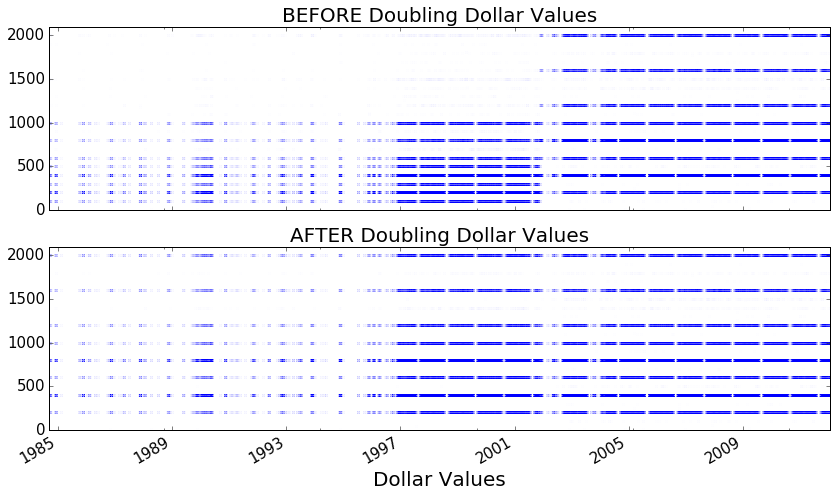

In [29]:
fig, ax = plt.subplots(2,1,figsize=(14,8),sharex=True)
df.plot(x='air_date', y='value_original',  style = '.', alpha = 0.005,
        legend = False,ax=ax[0], fontsize = 15);
df.plot(x='air_date', y='value', style = '.', alpha = 0.005, 
        legend = False, ax=ax[1], fontsize = 15);

ymin = 0.0
ymax = 2100.0
ax[0].set_title('BEFORE Doubling Dollar Values',fontsize = 20);
ax[0].set_ylim(ymin,ymax);
ax[1].set_title('AFTER Doubling Dollar Values',fontsize = 20);
ax[1].set_ylim(ymin,ymax)
plt.xlabel("Air Date",fontsize = 20);
plt.xlabel("Dollar Values",fontsize = 20);

That looks good! Notice that in the "BEFORE plot," the most common values under \$500 before 2001 are \$100, \$200, \$300, \$400, and \$500. Compare this to the "AFTER plot" which has common values of \$200 and \$400 at all times. The doubling looks successful!

## Is the data well-sampled?

The previous plot shows that the data wasn't sampled very evenly in time. Before around 1997, the data looks sparse.

How many questions *should* there be every year? Assuming all questions are viewed in every game, what is the maximum number of questions viewed per year? There are 30 questions per round plus the Final Jeopardy question, so there are at most 61 questions per game. Then assuming 52 weeks per year and 5 games per week, there should be *at most* 15860 questions per year.

$ (61 \textrm{ questions/game})  \times (5 \textrm{  games/week})  \times (52  \textrm{  weeks/year})    = 15860 \textrm{ questions/year   } $

Now let's see how that compares with the data we have.

In [30]:
# Resample the data yearly, "A" and then count it up.
resample_df = df.resample('A', on='air_date')['question'].count()
resample_df = pd.DataFrame(resample_df)
resample_df.head()

,question
air_date,
1984-12-31,1179
1985-12-31,888
1986-12-31,1409
1987-12-31,1275
1988-12-31,1290


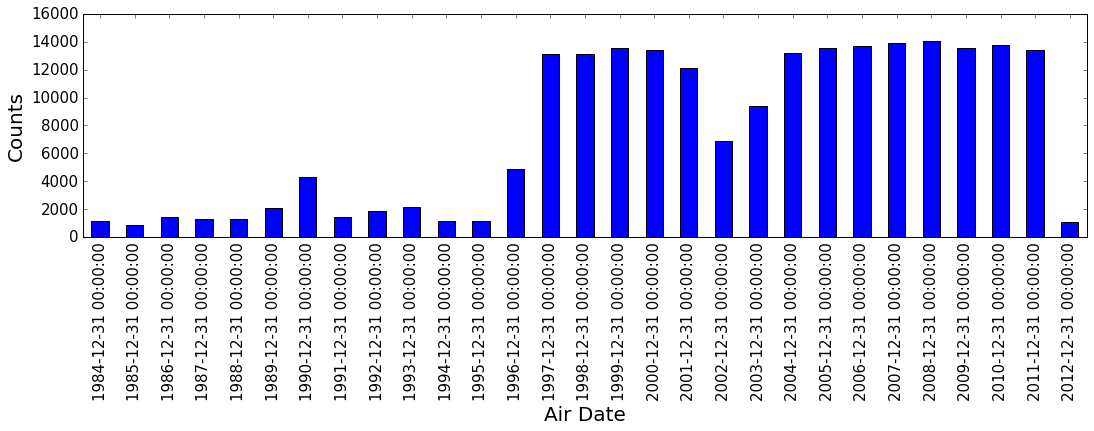

In [31]:
# Now plot it.
ax = resample_df.plot.bar(legend = False, figsize=(18,4), fontsize = 15)
ax.set_xlabel("Air Date",fontsize = 20)
ax.set_ylabel("Counts",fontsize = 20);

In [32]:
# Those x axis labels are pretty awful. Let's clean them up.
resample_df['year'] = resample_df.index.year
resample_df = resample_df.set_index('year')

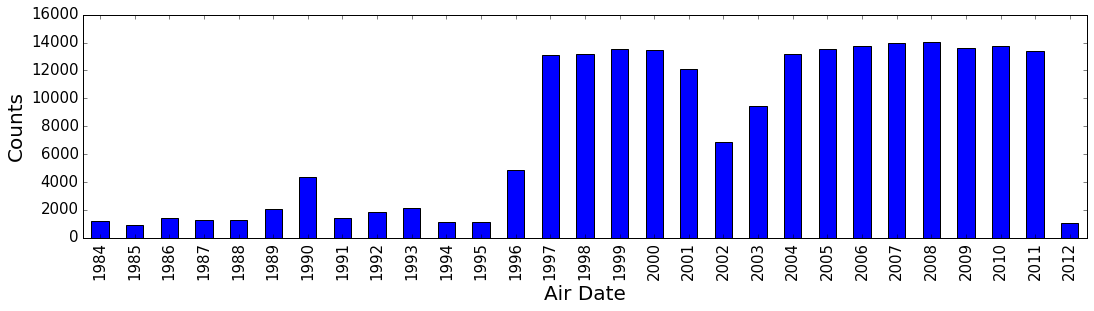

In [33]:
ax = resample_df['question'].plot.bar(figsize=(18,4), fontsize = 15)
ax.set_xlabel("Air Date",fontsize = 20)

ax.set_ylabel("Counts",fontsize = 20);

Yes, it looks like the dataset was not sampled evenly. 

In [34]:
# What is the maximum number of questions in a year?
resample_df.max()

question    14036
dtype: int64

Remember, there should be at most about 15,000 questions per year. The maximum value is just over 14,000, which makes sense because not all questions are always viewed in each round of Jeopardy. 

Sometimes a whole column will go unrevealed, which is about 10% of the questions (or 6/61). 
If I assume that some questions aren't revealed and that some years will have fewer game days, then I will only use years within 20% of the maximum value of 15860. 



In [35]:
0.8*15860

12688.0

In [36]:
resample_df[resample_df['question'] >= 12688]

,question
year,
1997,13099
1998,13143
1999,13540
2000,13439
2004,13190
2005,13560
2006,13726
2007,13940
2008,14036


It looks like the years 1997-2000 and 2004-2011 are well-sampled. 

## Done, for now.

In order to work with this cleaned dataset later, let's output it to another JSON file that pandas can read. This way I can start with this cleaned dataset next time.

In [37]:
# First remove unnecessary column.
del df['value_original']
# Now output the dataframe to a JSON file.
pd.DataFrame.to_json(df, 'JEOPARDY_QUESTIONS1_cleaned.json', date_format='iso') # Output date/times as strings.